<a href="https://colab.research.google.com/github/journalWheat/CSI4106Project1-JaredWagner/blob/main/CSI4106Project1_JaredWagner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTHOR INFO
Intellectual property of JARED WAGNER, October 2022.

Project 1: CSI4106 (Introduction ot Artificial Intelligence), University of Ottawa, Fall Semester.

#What's in an airline?

The dataset I have chosen for this project contains customer satisfaction for travellers aboard an unnamed airline (which I shall refer to as "Fastway Air" for the purposes of this report.) Each sample contains data about the trip itself (e.g. how long the flight was delayed), some light demographic information (age and sex), and some evidently self-reported data from the customer rating different aspects of their trip.

My main focus parsing this data will be to create models which can accurately determine whether a customer was 'satisfied' or 'unsatisfied or neutral' with their trip, using the predictors I have available to me. Because there are only two categories under consideration, this is a binary classification problem.

Customer satisfaction is a valuable business metric. For Fastway Air, the ability to categorize a customer are 'satisfied' or not could impact how they change their internal business practices (to maximize satisfaction), or how they make it up to customers who they can predict were unhappy with their 8-hour trip to Europe with poor wifi service. In my own experience with SkipTheDishes -- a food delivery service -- my wrath has been suspended time after time when they succesfully predict my dissatisfaction with a 1-hour-over-estimated lag-time and send me an email to say "sorry for the wait! Here's $5 off."

# Analyzing the data

The following code snippets provide insight into the distribution of data. First, the data is imported from CSV to a Pandas DataFrame. Next, summary statistics for each column are printed. After that, histograms are generated to visually inspect the distribution of the data. Finally, each column is counted to check for null fields.

In [1]:
# https://datagy.io/histogram-python/ was used as a resource for initial data analysis

# importing relevant
import pandas as pd
import matplotlib.pyplot as plt
airline_raw_df = pd.read_csv('https://raw.githubusercontent.com/journalWheat/CSI4106Project1-JaredWagner/main/airline_passenger_satisfaction.csv')

In [ ]:
# display stats for all numeric columns
print(airline_raw_df.describe())

In [ ]:
# display histograms for all columns
for column in airline_raw_df:
  plt.hist(airline_raw_df[column])
  plt.xlabel('Bucket')
  plt.ylabel('Number of Responses')
  plt.title(column + ' distribution')
  plt.show()

In [ ]:
# count number of non-null responses in each column
airline_raw_df.count()

From the information above, there are 129,880 samples and 22 features to select from. Only one feature has null values, 'arrival_dely_in_minutes,' but this will become irrelevant in the next section.

# Feature engineering

Building upon the last section, the initial startegy I employ is to only consider the self-reported metrics given by fliers. These are:
- inflight_wifi_service
- departure_arrival_time_convenient
- ease_of_online_booking
- gate_location
- food_and_drink
- online_boarding
- seat_comfort
- inflight_entertainment
- onboard_service
- baggage_handling
- checkin_service
- inflight_service
- cleanliness

The reason I choose this approach is because encoding these metrics will be easier later on. These metrics are similar, as they are all reported on a scale of 0-5 (where 0 indicates "non-applicable", and 1-5 is a rating of the service provided). Additionally, these features have no missing data (...although only 'arrival_delay_in_minutes' seems to have missing data anyway.)

This also reduces the number of features under consideration from 22 to just 13.

To examine these features further, they are copied into a new dataframe 'rf_df' ('response-features dataframe'). The 'satisfaction' column is also modified so that data is presented in binary, where 1 indicates that the customer is satisfies and 0 indicates that the customer was neutral or dissatisfied. 

Finally, the analysis performed on the raw airline data is repeated.

In [5]:
# copying the features I care about to a new dataset
#'rf_df'='response features dataframe'
rf_df = airline_raw_df[['inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking','gate_location','food_and_drink','online_boarding','seat_comfort','inflight_entertainment','onboard_service','baggage_handling','checkin_service','inflight_service','cleanliness', 'satisfaction']].copy()

# transformation on 'satisfaction'
rf_df['satisfaction'] = rf_df['satisfaction'].replace({'satisfied':1,'neutral or dissatisfied':0})

In [ ]:
rf_df.hist()
plt.show() # show a tight grid of histograms for the features under consideration

print(rf_df.describe()) # print data about the features under consideration

From here, I look for correlations between survey scores using a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7928715b10>,
      dtype=object)

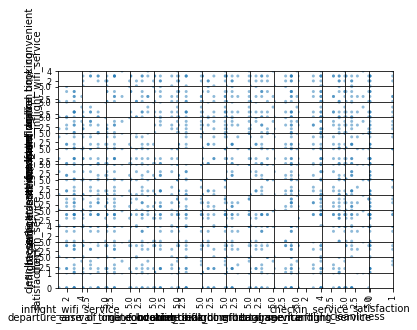

In [14]:
# resource used: https://www.marsja.se/pandas-scatter-matrix-pair-plot/

pd.plotting.scatter_matrix(rf_df[0:10],diagonal='satisfaction')

#Encoding

Special consideration has to be given to have data is encoded for each model. The following documents from Scikit-learn were used to help inform me of how to use each classifier. In bullet point form, I have listed considerations for each model's encoding.

Naive bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

- This documentation is, by far, the most in-depth of the three sources.
- 

Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- blah 2

Multi-layer perceptron: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- blah 3

# Preparing for cross-validation
...blah blah blah

# Training Naive Bayes: Version 1
In this section, I'll train a Naive Bayes model using the details I have discussed up until the end of the section "Preparing for cross-validation."